In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fundusData.datamodules.classification import DDRDataModule, IDRiDDataModule, EyePACSDataModule, AptosDataModule
from fundusData.datamodules.utils import merge_existing_datamodules
from fundusData.datamodules import CLASSIF_PATHS, SEG_PATHS

In [3]:
img_size = (512, 512)
idrid_datamodule = IDRiDDataModule(CLASSIF_PATHS.IDRID, img_size=img_size, batch_size=8).setup_all()
eyepacs_datamodule = EyePACSDataModule(CLASSIF_PATHS.EYEPACS, img_size=img_size, batch_size=8).setup_all()
aptos_datamodule = AptosDataModule(CLASSIF_PATHS.APTOS, img_size=img_size, batch_size=8).setup_all()
ddr_datamodule = DDRDataModule(CLASSIF_PATHS.DDR, img_size=img_size, batch_size=8).setup_all()


/home/clement/miniforge-pypy3/envs/cugraph/lib/python3.10/site-packages/nntools/utils/plotting.py:151: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


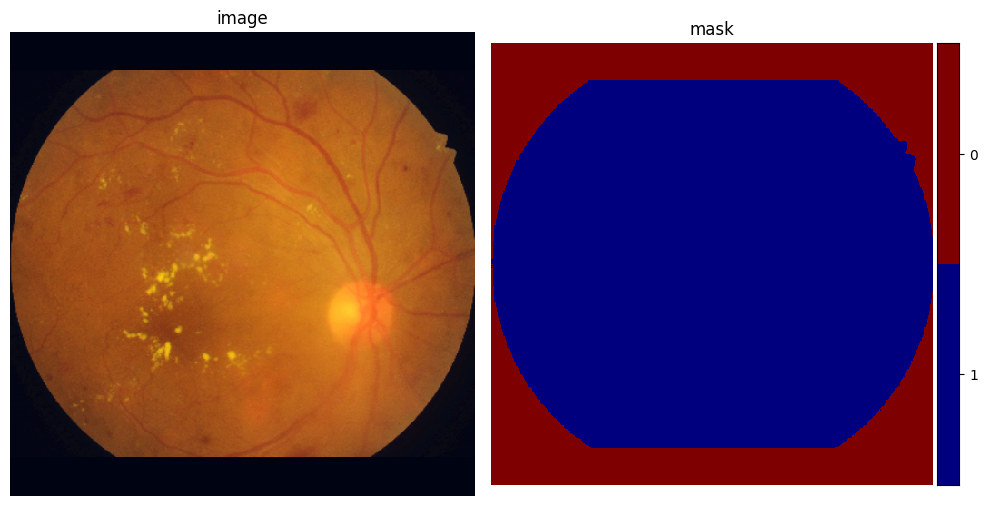

In [4]:
datamodules = merge_existing_datamodules([idrid_datamodule, eyepacs_datamodule, aptos_datamodule, ddr_datamodule], 
                                         separate_test_sets=False)

datamodules.train.plot(0)

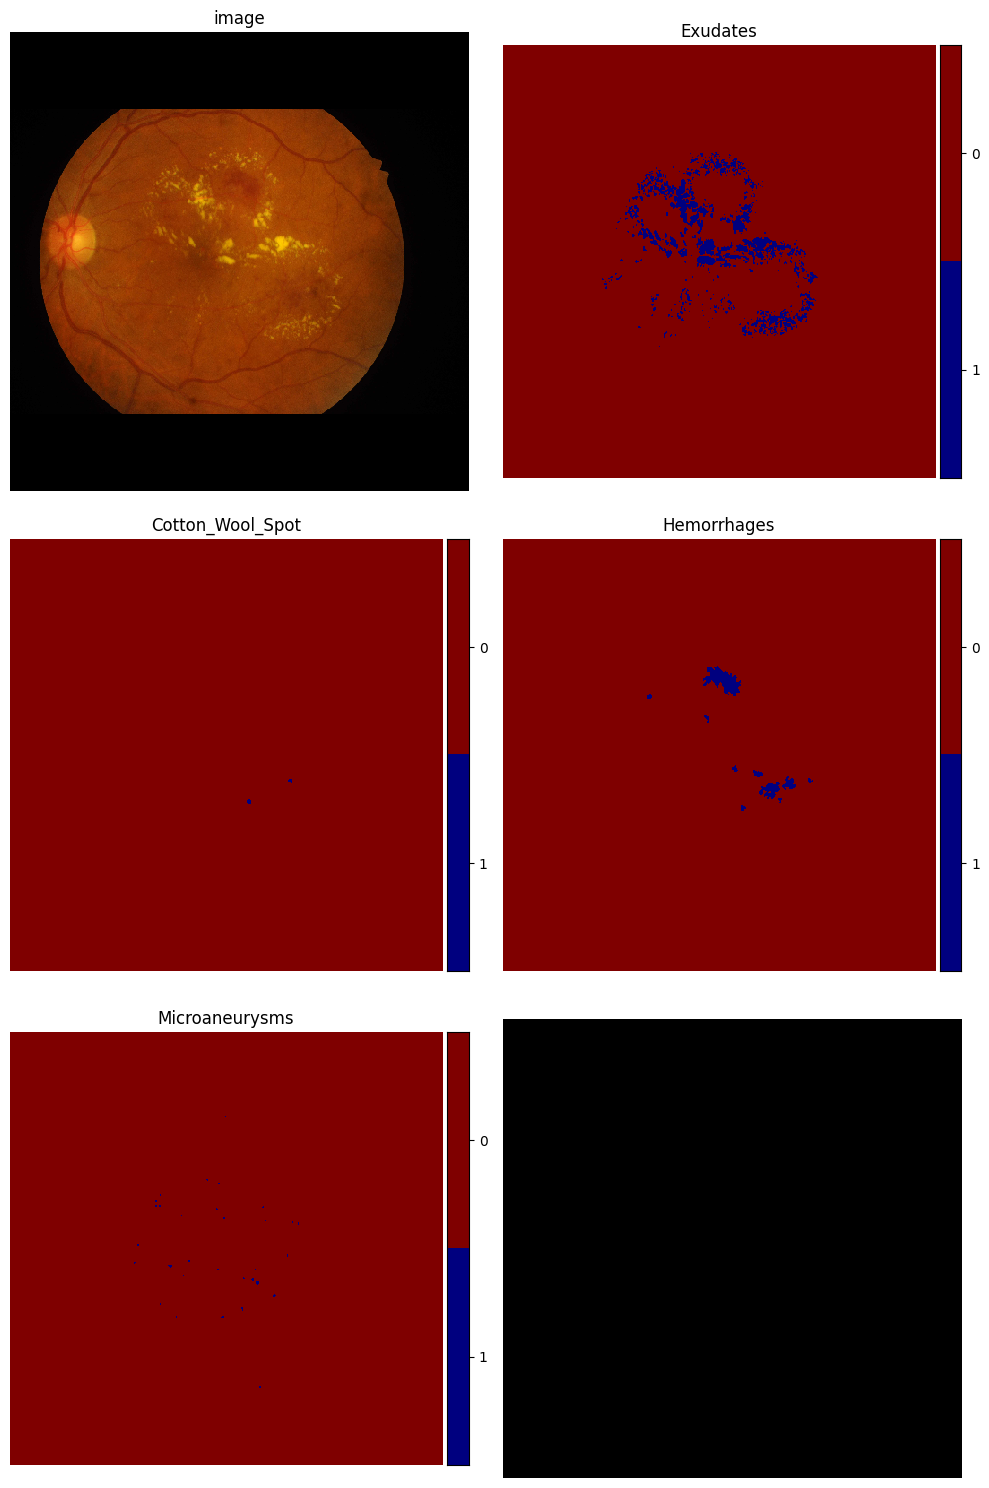

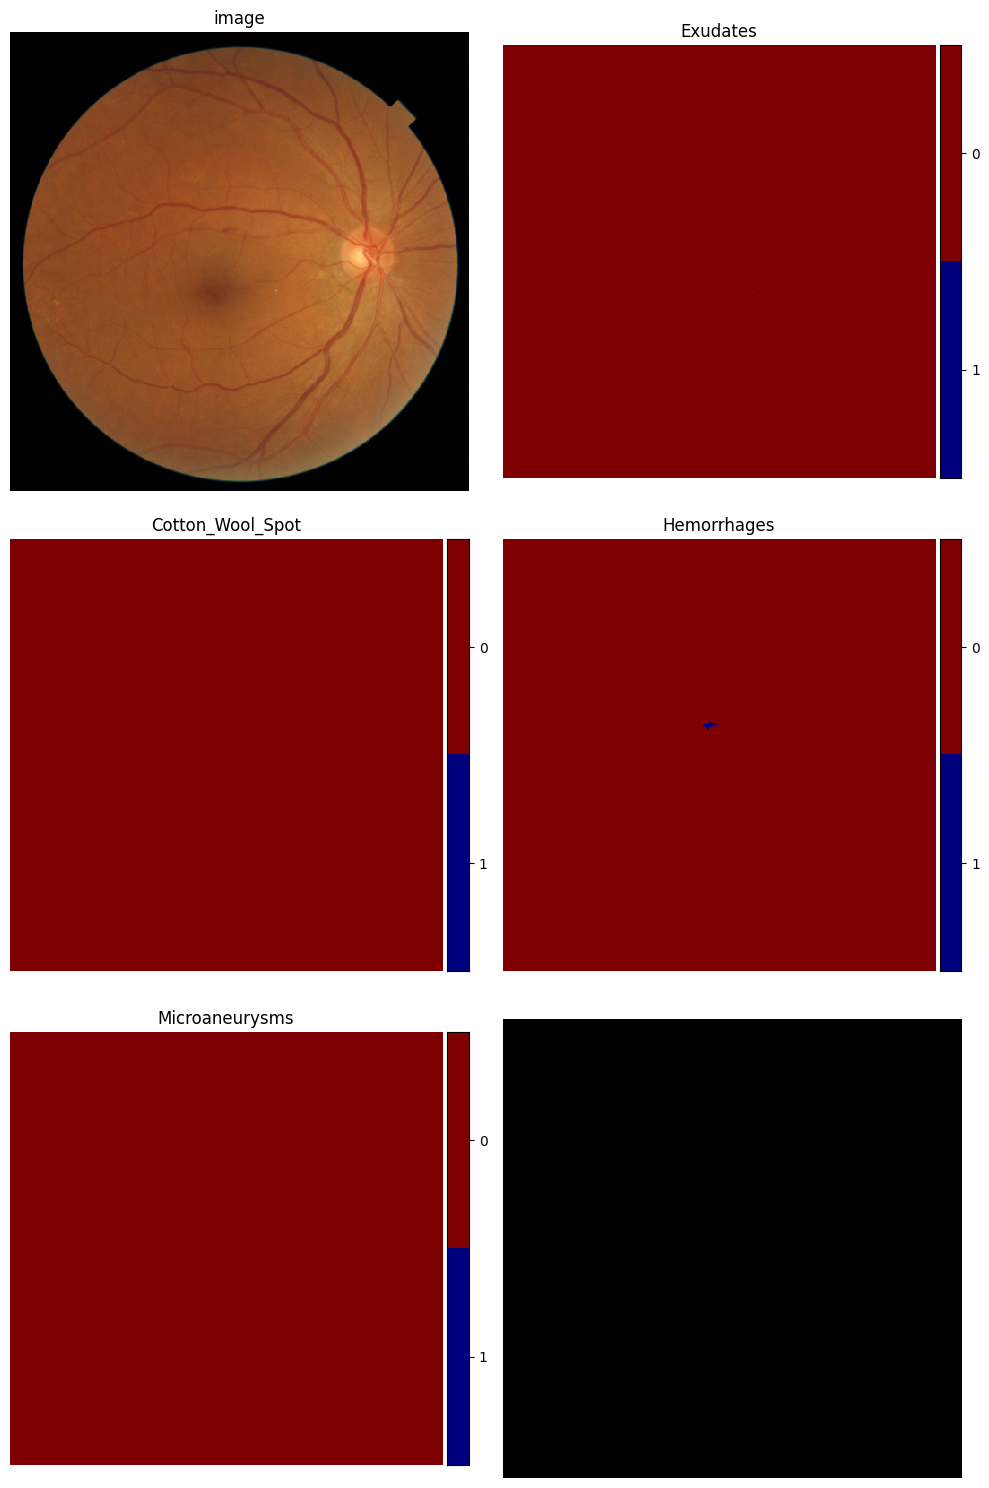

In [5]:
from fundusData.datasets.segmentation import get_IDRiD_dataset, DatasetVariant, get_DDR_dataset
img_size = (512, 512)
idrid_seg_dataset = get_IDRiD_dataset(SEG_PATHS.IDRID, variant=DatasetVariant.TEST, img_size=img_size)
idrid_seg_dataset.plot(0)

ddr_seg_dataset = get_DDR_dataset(SEG_PATHS.DDR, variant=DatasetVariant.TEST, img_size=img_size)
ddr_seg_dataset.plot(0)